In [1]:
import pandas as pd
import numpy as np
from statistics import mean, stdev
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import metrics
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from time import time
from xgboost import plot_importance

In [2]:
#load data
train = pd.read_csv('C:/Stats Consulting/train_final.csv')
train.head()

,user_id,seller_id,label,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,34176,3906,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34176,121,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34176,4356,1,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34176,2217,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,230784,4818,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
test = pd.read_csv('C:/Stats Consulting/test_final.csv')
test.head()

,user_id,seller_id,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,user_age_35_39,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,163968,4605,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360576,1581,0,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,1.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98688,1964,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98688,3645,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,295296,3361,0,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#fill all infinite entry with 0
train = train.replace(np.inf, 0)
test = test.replace(np.inf, 0)

In [5]:
#data split (training_set, testing_set)
data_output = train.label
data_input = train.drop('label',axis=1)
#unbalanced
data_output.sum()/data_output.count()
print('In the original data, counts of label 1:',format(sum(data_output==1)))
print('In the original data, counts of label 0:',format(sum(data_output==0)))

In the original data, counts of label 1: 15952
In the original data, counts of label 0: 244912


In [6]:
training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(data_input, data_output, test_size=0.3, random_state=1)
print(training_set_x.shape, testing_set_x.shape, training_set_y.shape, testing_set_y.shape)

(182604, 81) (78260, 81) (182604,) (78260,)


In [7]:
np.isfinite(training_set_x).all()

user_id                                    True
seller_id                                  True
user_gender_female                         True
user_gender_male                           True
user_gender_unknown                        True
                                           ... 
user_seller_purchase_rt_db11_wk            True
user_seller_add_to_favorite_rt_db11_wk     True
user_seller_click_rt_db11_mth              True
user_seller_purchase_rt_db11_mth           True
user_seller_add_to_favorite_rt_db11_mth    True
Length: 81, dtype: bool

In [8]:
training_set_x_id = training_set_x[['user_id','seller_id']]
testing_set_x_id = testing_set_x[['user_id', 'seller_id']]
training_set_x = training_set_x.drop(['user_id','seller_id'], axis=1)
testing_set_x = testing_set_x.drop(['user_id','seller_id'], axis=1)

In [9]:
testing_set_x_id.head()

,user_id,seller_id
10287,189342,4385
38400,342513,1608
231446,265001,246
88252,307588,1861
56734,118311,4808


In [10]:
print(training_set_x.shape)
print(testing_set_x.shape)

(182604, 79)
(78260, 79)


In [44]:
#initial model fitting
#random forest
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
#fit on training data
model_rf.fit(training_set_x, training_set_y)
#predictions
rf_predictions = model_rf.predict(testing_set_x)
rf_probs = model_rf.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:',metrics.accuracy_score(testing_set_y, rf_predictions))
print('ROC AUC:', metrics.roc_auc_score(testing_set_y, rf_probs))

Accuracy: 0.9380143112701252
ROC AUC: 0.6266996853466019


In [45]:
np.mean(rf_predictions)

0.00017889087656529517

In [46]:
#Gradient Boosting
model_gbm = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
#fit on training data
model_gbm.fit(training_set_x, training_set_y)
#predictions
gbm_predictions = model_gbm.predict(testing_set_x)
gbm_probs = model_gbm.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, gbm_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, gbm_probs))

Accuracy: 0.9381165346281626
ROC AUC 0.6626332093266523


In [47]:
np.mean(gbm_predictions)

0.0

In [48]:
#XGB
model_xgb = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
#fit on training data
model_xgb.fit(training_set_x, training_set_y)
#predictions
xgb_predictions = model_xgb.predict(testing_set_x)
xgb_probs = model_xgb.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, xgb_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, xgb_probs))

Accuracy: 0.9381165346281626
ROC AUC 0.6687084341115134


In [49]:
np.mean(xgb_predictions)

0.0001277791975466394

In [50]:
#SMOTE
sm = SMOTE(random_state=2)
training_set_x_res, training_set_y_res = sm.fit_sample(training_set_x, training_set_y.ravel())
#print percentage of output after oversampling
print('After oversampling, counts of label 1:',format(sum(training_set_y_res==1)))
print('After oversampling, counts of label 0:',format(sum(training_set_y_res==0)))

After oversampling, counts of label 1: 171495
After oversampling, counts of label 0: 171495


In [51]:
#random forest model fitting with over sampling data
model_rf_2 = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
#fit on training data
model_rf_2.fit(training_set_x_res, training_set_y_res)
#predictions
rf2_predictions = model_rf_2.predict(testing_set_x)
rf2_probs = model_rf_2.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:',metrics.accuracy_score(testing_set_y, rf2_predictions))
print('ROC AUC:', metrics.roc_auc_score(testing_set_y, rf2_probs))

Accuracy: 0.9370559672885255
ROC AUC: 0.6159757561828828


In [52]:
np.mean(rf2_predictions)

0.001903910043444927

In [53]:
#Gradient Boosting
model_gbm_2 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
#fit on training data
model_gbm_2.fit(training_set_x_res, training_set_y_res)
#predictions
gbm2_predictions = model_gbm_2.predict(testing_set_x)
gbm2_probs = model_gbm_2.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, gbm2_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, gbm2_probs))

Accuracy: 0.9373243036033734
ROC AUC 0.6019417180008543


In [54]:
np.mean(gbm2_predictions)

0.001303347814975722

In [55]:
#XGB
model_xgb_2 = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
#fit on training data
model_xgb_2.fit(training_set_x_res, training_set_y_res)
#predictions
xgb_2_predictions = model_xgb_2.predict(testing_set_x)
xgb_2_probs = model_xgb_2.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, xgb_2_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, xgb_2_probs))

Accuracy: 0.9377331970355226
ROC AUC 0.6248724770437304


In [56]:
np.mean(xgb_2_predictions)

0.000664451827242525

In [57]:
#RUS (under sampling)
rus = RandomUnderSampler()
training_x_rus, training_y_rus = rus.fit_sample(training_set_x, training_set_y)
#print percentage of output after oversampling
print('After undersampling, counts of label 1:',format(sum(training_y_rus==1)))
print('After undersampling, counts of label 0:',format(sum(training_y_rus==0)))

After undersampling, counts of label 1: 11109
After undersampling, counts of label 0: 11109


In [58]:
#random forest model fitting with under sampling data
model_rf_3 = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
#fit on training data
model_rf_3.fit(training_x_rus, training_y_rus)
#predictions
rf3_predictions = model_rf_3.predict(testing_set_x)
rf3_probs = model_rf_3.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:',metrics.accuracy_score(testing_set_y, rf3_predictions))
print('ROC AUC:', metrics.roc_auc_score(testing_set_y, rf3_probs))

Accuracy: 0.6372220802453361
ROC AUC: 0.6467373159441926


In [59]:
np.mean(rf3_predictions)

0.3722208024533606

In [60]:
#Gradient Boosting
model_gbm_3 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
#fit on training data
model_gbm_3.fit(training_x_rus, training_y_rus)
#predictions
gbm3_predictions = model_gbm_3.predict(testing_set_x)
gbm3_probs = model_gbm_3.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, gbm3_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, gbm3_probs))

Accuracy: 0.6441349348326092
ROC AUC 0.6550006614804019


In [61]:
np.mean(gbm3_predictions)

0.365665729619218

In [62]:
#XGB
model_xgb_3 = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
#fit on training data
model_xgb_3.fit(training_x_rus, training_y_rus)
#predictions
xgb_3_predictions = model_xgb_3.predict(testing_set_x)
xgb_3_probs = model_xgb_3.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, xgb_3_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, xgb_3_probs))

Accuracy: 0.6473038589317659
ROC AUC 0.6585739648586859


In [63]:
np.mean(xgb_2_predictions)

0.000664451827242525

In [12]:
train_data_input = data_input.drop(['user_id','seller_id'], axis=1)
train_data_input.head()

,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,user_age_35_39,user_age_40_49,user_age_50_,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# define imbalanced stratified k-fold cross validation with different sampling method
def imbalance_cv_score(model, x, y, cv, scoring, sampling_method):
    '''
    This function computes the cross-validation score using a selected sampling method to adjust imbalance dataset, using 
    stratified k-fold cross validation. 
    
    The first five arguments are the same with cross_val_score in sklearn package
    
    model = selected machine learning model
    x = data input
    y = data outcome(label)
    cv = number of folds(k)
    scoring = scoring metrics selected for evaluation. *Currently support accuracy_score, balance_accuracy, 
    f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, ndcg_score in sklearn.metrics package*
    sampling_method: choice of random sampler: Object that is similar to sampler object from python imbalanced-learn package
    with the method sampling_method.fit_sample()

    '''
    cv_score = []
    test_score = 0
    cv_method = StratifiedKFold(n_splits=cv)
    pred_score_method_list = [metrics.accuracy_score,metrics.balanced_accuracy_score,metrics.f1_score, metrics.precision_score,
                             metrics.recall_score]
    pred_prob_method_list = [metrics.roc_auc_score,metrics.average_precision_score,metrics.ndcg_score]
    for train_index, test_index in cv_method.split(x,y):
        xfold_train, yfold_train = sampling_method.fit_sample(x.iloc[train_index],y.iloc[train_index])
        model.fit(xfold_train, yfold_train)
        model_predictions = model.predict(x.iloc[test_index])
        model_probs = model.predict_proba(x.iloc[test_index])[:, 1]
        if scoring in pred_score_method_list:
            score = scoring(y.iloc[test_index], model_predictions)
        elif scoring in pred_prob_method_list:
            score = scoring(y.iloc[test_index], model_probs)
        else:
            print('Sorry, Current scoring method not available now.')
        cv_score.append(score)
    return cv_score

In [68]:
Random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
GBM_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
XGB_model = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
model_list= [Random_forest_model, GBM_model, XGB_model]
sampler_list = [SMOTE(),RandomUnderSampler(),ADASYN()]
results_acc = []
time_res = []
names = []
for model in model_list:
    name = model.__class__.__name__
    for sm in sampler_list:
        start = time()
        sm_name = sm.__class__.__name__
        scores = imbalance_cv_score(model, train_data_input, data_output, 5, metrics.accuracy_score, sm)
        results_acc.append(mean(scores))
        names.append(name)
        end = time()
        time_use = end - start
        time_res.append(time_use)
        print('The accuracy score for ', name, 'is ', mean(scores), 
              'with the Std of', stdev(scores), 'using sampling method ', sm_name, 'in time: ',time_use)

The accuracy score for  RandomForestClassifier is  0.9378450075622369 with the Std of 6.807343177108824e-05 using sampling method  SMOTE in time:  923.634824514389
The accuracy score for  RandomForestClassifier is  0.6366880878010754 with the Std of 0.0027509060097213977 using sampling method  RandomUnderSampler in time:  53.141502141952515
The accuracy score for  RandomForestClassifier is  0.9379906769985434 with the Std of 0.00015777203435379363 using sampling method  ADASYN in time:  1583.4405930042267
The accuracy score for  LGBMClassifier is  0.9383126835153565 with the Std of 0.00015864067255876686 using sampling method  SMOTE in time:  91.11737251281738
The accuracy score for  LGBMClassifier is  0.6442552318351328 with the Std of 0.00643904764665986 using sampling method  RandomUnderSampler in time:  38.27532434463501
The accuracy score for  LGBMClassifier is  0.9384430192030392 with the Std of 0.00017742049804691146 using sampling method  ADASYN in time:  202.69166827201843
The

In [69]:
time_res = pd.DataFrame(time_res, columns=['Time'])
acc_res = pd.DataFrame(results_acc, columns=['Accuracy_score'])

In [70]:
results_auc = []
names = []
time_res_2 = []
for model in model_list:
    name = model.__class__.__name__
    for sm in sampler_list:
        start = time()
        sm_name = sm.__class__.__name__
        scores = imbalance_cv_score(model, train_data_input, data_output, 5, metrics.roc_auc_score, sm)
        results_auc.append(mean(scores))
        names.append(name)
        end = time()
        time_use = end - start
        time_res_2.append(time_use)
        print('The AUC score for ', name, 'is ', mean(scores), 
              'with the Std of',stdev(scores), 'using sampling method ', sm_name, 'in time: ',time_use)

The AUC score for  RandomForestClassifier is  0.6192421885429908 with the Std of 0.00420349694939281 using sampling method  SMOTE in time:  786.3133022785187
The AUC score for  RandomForestClassifier is  0.65252307792151 with the Std of 0.005976935933975181 using sampling method  RandomUnderSampler in time:  52.763816595077515
The AUC score for  RandomForestClassifier is  0.6197410865223703 with the Std of 0.0035674869473518948 using sampling method  ADASYN in time:  846.5520536899567
The AUC score for  LGBMClassifier is  0.60331763442607 with the Std of 0.010191807649188686 using sampling method  SMOTE in time:  72.90432167053223
The AUC score for  LGBMClassifier is  0.6626757084841813 with the Std of 0.005561470579210789 using sampling method  RandomUnderSampler in time:  15.070080518722534
The AUC score for  LGBMClassifier is  0.6027030129050597 with the Std of 0.009504551369918056 using sampling method  ADASYN in time:  129.43742442131042
The AUC score for  XGBClassifier is  0.6308

In [71]:
auc_res = pd.DataFrame(results_auc, columns=['AUC_score'])
sampler = pd.DataFrame({'Sampler_method':['SMOTE','RandomUnderSampler','ADASYN','SMOTE','RandomUnderSampler','ADASYN',
                                        'SMOTE','RandomUnderSampler','ADASYN']})
coef = pd.concat([time_res, acc_res, auc_res, sampler],axis=1)
coef.index=['RF','RF','RF','GBM','GBM','GBM','XGB','XGB','XGB']

In [72]:
coef.to_csv('C:/Stats Consulting/Coef.csv')

In [73]:
coef

,Time,Accuracy_score,AUC_score,Sampler_method
RF,923.634825,0.937845,0.619242,SMOTE
RF,53.141502,0.636688,0.652523,RandomUnderSampler
RF,1583.440593,0.937991,0.619741,ADASYN
GBM,91.117373,0.938313,0.603318,SMOTE
GBM,38.275324,0.644255,0.662676,RandomUnderSampler
GBM,202.691668,0.938443,0.602703,ADASYN
XGB,767.406038,0.938635,0.630882,SMOTE
XGB,66.104734,0.651976,0.664417,RandomUnderSampler
XGB,431.023908,0.938627,0.628890,ADASYN


After oversampling, counts of label 1: 171495
After oversampling, counts of label 0: 171495


Text(0, 0.5, 'Number of Records')

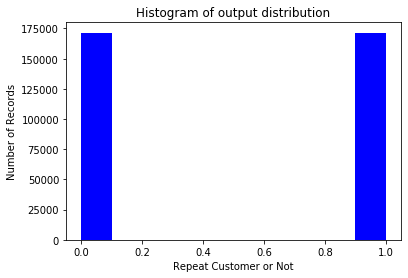

In [14]:
#  best model
XGB_model = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
# data sampling using SMOTE
sm = SMOTE()
training_x_sm, training_y_sm = sm.fit_sample(training_set_x, training_set_y)
#print percentage of output after oversampling
print('After oversampling, counts of label 1:',format(sum(training_y_sm==1)))
print('After oversampling, counts of label 0:',format(sum(training_y_sm==0)))
#plot output distribution after oversampling
pyplot.hist(training_y_sm, color='blue')
pyplot.title('Histogram of output distribution')
pyplot.xlabel('Repeat Customer or Not')
pyplot.ylabel('Number of Records')

In [15]:
#fit on training data
XGB_model.fit(training_x_sm, training_y_sm)
#predictions
best_model_pred = XGB_model.predict(testing_set_x)
best_model_probs = XGB_model.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, best_model_pred))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, best_model_probs))

Accuracy: 0.9379376437515973
ROC AUC 0.6285759544889109


In [18]:
np.mean(best_model_pred)

0.0006005622284692053

In [16]:
XGB_model.get_booster().get_score(importance_type='weight')

{'user_seller_purchase_day_rt': 547,
 'user_seller_item_cnt': 100,
 'user_age_25_29': 204,
 'user_age_30_34': 140,
 'user_seller_click_days': 81,
 'brand_similarity_score': 183,
 'user_seller_cat_cnt': 46,
 'user_gender_male': 58,
 'user_gender_female': 94,
 'user_gender_unknown': 38,
 'seller_click_days': 34,
 'user_item_cnt': 366,
 'seller_purchase_rt': 194,
 'seller_purchase_cnt': 100,
 'user_seller_purchase_rt': 236,
 'seller_add_to_cart_cnt': 69,
 'seller_action_total_days': 39,
 'seller_purchase_day_rt': 100,
 'seller_item_cnt': 144,
 'user_action_total_days': 60,
 'seller_add_to_cart_days': 58,
 'user_age_35_39': 71,
 'user_seller_action_total_cnt': 53,
 'user_age_18_24': 70,
 'user_seller_purchase_cnt': 62,
 'cat_similarity_score': 138,
 'user_purchase_rt': 196,
 'user_seller_purchase_cnt_db11': 48,
 'user_seller_click_cnt': 35,
 'seller_cat_cnt': 32,
 'user_seller_click_rt_db11': 42,
 'seller_click_cnt': 66,
 'user_seller_click_cnt_db11': 59,
 'user_seller_add_to_favorite_days

In [17]:
XGB_model.get_booster().get_score(importance_type='gain')

{'user_seller_purchase_day_rt': 1240.7295470437539,
 'user_seller_item_cnt': 146.4212660377161,
 'user_age_25_29': 1192.8373170752227,
 'user_age_30_34': 1073.7224471358516,
 'user_seller_click_days': 149.12133424863583,
 'brand_similarity_score': 77.11785386848688,
 'user_seller_cat_cnt': 15.859300065542174,
 'user_gender_male': 697.8888443203263,
 'user_gender_female': 1503.9663368771417,
 'user_gender_unknown': 2418.4510399836577,
 'seller_click_days': 15.1389593317647,
 'user_item_cnt': 659.1947904810581,
 'seller_purchase_rt': 27.338801616726823,
 'seller_purchase_cnt': 31.09853823894998,
 'user_seller_purchase_rt': 327.5399647364706,
 'seller_add_to_cart_cnt': 25.157285426434782,
 'seller_action_total_days': 18.87777088333333,
 'seller_purchase_day_rt': 39.96568740281697,
 'seller_item_cnt': 17.481638424038902,
 'user_action_total_days': 23.987569630833338,
 'seller_add_to_cart_days': 23.662735165534485,
 'user_age_35_39': 820.5721481722943,
 'user_seller_action_total_cnt': 97.56

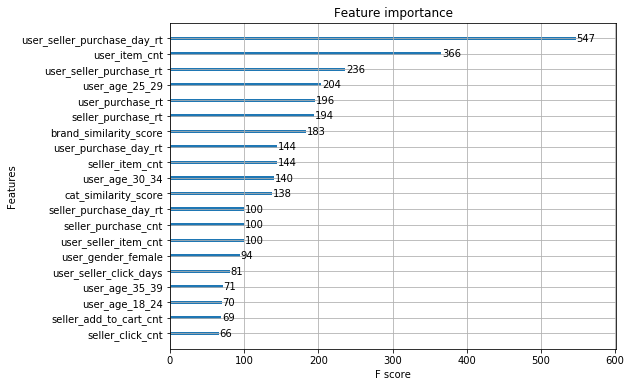

In [46]:
plot_importance(XGB_model, max_num_features=20)
pyplot.gcf().set_size_inches(8, 6, forward=True)
pyplot.savefig('C:/Stats Consulting/feature_importance_plot.png',bbox_inches = "tight")
pyplot.show()

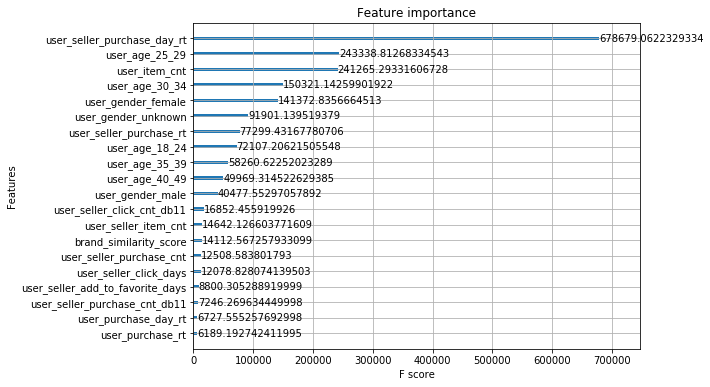

In [47]:
plot_importance(XGB_model.get_booster().get_score(importance_type='total_gain'), max_num_features=20)
pyplot.gcf().set_size_inches(8, 6, forward=True)
pyplot.savefig('C:/Stats Consulting/feature_importance_plot_gain.png', bbox_inches = "tight")
pyplot.show()

In [20]:
prediction_output = pd.DataFrame(best_model_pred, columns=['Repeat_Customer'])

In [21]:
prediction_output.isnull()

,Repeat_Customer
0,False
1,False
2,False
3,False
4,False
...,...
78255,False
78256,False
78257,False
78258,False


In [22]:
testing_set_x_id.shape

(78260, 2)

In [23]:
final_output = pd.concat([testing_set_x_id.reset_index(drop=True), prediction_output.reset_index(drop=True)], axis=1)

In [24]:
final_output.head()
final_output.to_csv('C:/Stats Consulting/prediction_output.csv')